In [63]:
import numpy as np

class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
        size = 1+X.shape[1]
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target-self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >=0.0, 1, -1) 

In [64]:
import pandas as pd
import requests
from io import StringIO

res = requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', verify=False)
data = StringIO(res.text)
df = pd.read_csv(data, header=None)
df.head(5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
len(df)

150

In [69]:
import matplotlib.pyplot as plt

target_df = df[(df[4]=='Iris-setosa')|(df[4]=='Iris-versicolor')]
target_df.shape

(100, 5)

In [70]:
target_df[4].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [71]:
y = target_df.iloc[:,4].values
y = np.where(y=='Iris-setosa', -1, 1)

In [72]:
X = target_df.iloc[:,[0,2]].values
X.shape

(100, 2)

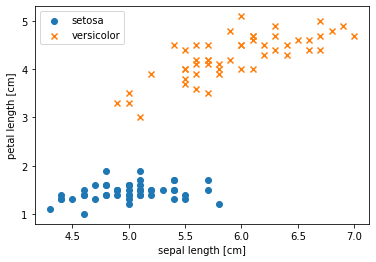

In [73]:
plt.scatter(X[:50,0], X[:50,1], marker='o', label='setosa');
plt.scatter(X[50:,0], X[50:,1], marker='x', label='versicolor');
plt.xlabel('sepal length [cm]');
plt.ylabel('petal length [cm]');
plt.legend(loc='upper left');

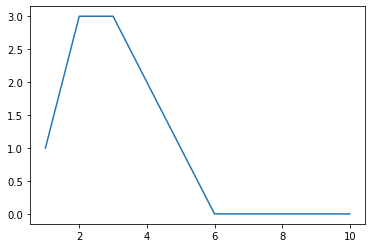

In [75]:
ppn = Perceptron(n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_)
plt.show();